In [1]:
from XRDXRFutils import SyntheticDataXRF
from matplotlib.pyplot import plot, show, subplots

### Read from outdata directory

In [17]:
datadir = '/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/outdata/'
synt = SyntheticDataXRF().read(datadir)

In [3]:
synt.shape

(1, 96, 2048)

In [4]:
synt.metadata

{'path': '/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb',
 'labels': array(['Pb-L', 'time', 'Si-KM', 'Sb-KO', 'Pb-M', 'Pb-M1', 'Sb-L', 'S-KL',
        'Sb-KM', 'Ca-K', 'Pb-M3', 'Pb-L3', 'Fe-KM', 'Pb-L2', 'Fe-KL',
        'Sb-L3', 'Fe-K', 'Sb-K', 'Cu-K', 'Sb-KL', 'Cu-L1', 'Si-KL',
        'Sb-L2', 'Cu-KL', 'Sb-L1', 'Sb-KN', 'Cu-L', 'Cu-KM', 'Si-K',
        'Ca-KM', 'Ca-KL', 'Pb-L1', 'Pb-M4', 'Ar-KM', 'Ar-K', 'S-KM',
        'Pb-M5', 'Ar-KL', 'Pb-M2', 'S-K'], dtype=object),
 'elements': array(['Sb', 'O', 'S', 'N', 'H', 'Ar', 'Pb', 'Cu', 'Ca', 'C', 'Fe', 'Si'],
       dtype=object),
 'layers': array(['air_top', 'pictorial', 'quartz'], dtype=object)}

In [5]:
synt.layers_names

['air_top', 'pictorial', 'quartz']

In [6]:
print(synt.spectra[0].layers) ### a single spectra (SyntheticSpectraXRF) see read_synthetic_spectra.ipynb

Layers
├── air_top density = 0.001205 thickness = 16645.3 μm
│   ├── C  0.0124
│   ├── N  75.5268
│   ├── O  23.1781
│   └── Ar  1.2827
├── pictorial density = 4.07118 thickness = 74.0371 μm
│   ├── H  0.040294
│   ├── C  1.62168
│   ├── O  37.2402
│   ├── Si  17.0732
│   ├── S  0.153816
│   ├── Ca  3.9241
│   ├── Fe  26.7564
│   ├── Cu  0.182354
│   ├── Sb  0.584083
│   └── Pb  12.424
└── quartz density = 2.648 thickness = 500.0 μm
    ├── O  53.2554
    └── Si  46.7446
Layers
├── air_top
│   ├── pigments  None
│   ├── volume_fractions  None
│   └── mass_fractions  None
├── pictorial
│   ├── pigments  ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue', 'antimony_orange']
│   ├── volume_fractions  [0.550943468492568, 0.0870710574729104, 0.19789190952087793, 0.14290239422598888, 0.014260587969035952, 0.006930582318618753]
│   └── mass_fractions  [0.3583475681310475, 0.1454327357127815, 0.38254472124649835, 0.095123591231562, 0.010788662080618294, 0.007762721597492263]
└── 

In [7]:
(synt.data.shape, synt.unconv_data.shape, synt.labels.shape)

((1, 96, 2048), (1, 96, 2048), (1, 96, 40))

### Read from a list of files
##### A big dataset can be splitted limiting memory usage.

In [8]:
from glob import glob

In [9]:
xmsolist = glob('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/outdata/*.xmso')

In [10]:
len(xmsolist)

96

In [14]:
xmsolist01 = xmsolist[:50]
xmsolist02 = xmsolist[50:]

In [15]:
synt01 = SyntheticDataXRF().read(xmsolist01)
synt02 = SyntheticDataXRF().read(xmsolist02)

In [18]:
synt.shape, synt01.shape, synt02.shape

((1, 96, 2048), (1, 50, 2048), (1, 46, 2048))

### Convoluted and Uncovoluted spectra

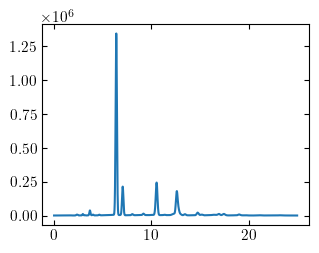

In [19]:
plot(synt.x,synt.data[0,0,:])

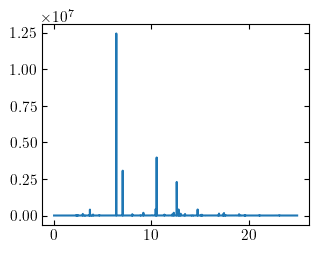

In [20]:
plot(synt.x, synt.unconv_data[0,0,:])

### Labels

In [21]:
print(synt.metadata['labels'], len(synt.metadata['labels']))

['Pb-L' 'time' 'Si-KM' 'Sb-KO' 'Pb-M' 'Pb-M1' 'Sb-L' 'S-KL' 'Sb-KM' 'Ca-K'
 'Pb-M3' 'Pb-L3' 'Fe-KM' 'Pb-L2' 'Fe-KL' 'Sb-L3' 'Fe-K' 'Sb-K' 'Cu-K'
 'Sb-KL' 'Cu-L1' 'Si-KL' 'Sb-L2' 'Cu-KL' 'Sb-L1' 'Sb-KN' 'Cu-L' 'Cu-KM'
 'Si-K' 'Ca-KM' 'Ca-KL' 'Pb-L1' 'Pb-M4' 'Ar-KM' 'Ar-K' 'S-KM' 'Pb-M5'
 'Ar-KL' 'Pb-M2' 'S-K'] 40


In [23]:
synt.labels.shape, synt01.labels.shape

((1, 96, 40), (1, 50, 40))

### Layers

In [25]:
print(synt.layers_names)
print(synt01.layers_names)

['air_top', 'pictorial', 'quartz']
['air_top', 'pictorial', 'quartz']


#### thickness

In [26]:
# thickness for each layer
print(synt._get_thickness().shape)
synt._get_thickness()

(96, 3)


array([[1.66453e+00, 7.40371e-03, 5.00000e-02],
       [1.54587e+00, 8.13497e-03, 5.00000e-02],
       [1.56026e+00, 8.34981e-03, 5.00000e-02],
       [1.36527e+00, 6.77771e-03, 5.00000e-02],
       [1.56988e+00, 8.46021e-03, 5.00000e-02],
       [1.82538e+00, 4.08426e-03, 5.00000e-02],
       [1.62775e+00, 8.63725e-03, 5.00000e-02],
       [1.52955e+00, 7.65809e-03, 5.00000e-02],
       [1.89225e+00, 4.22274e-03, 5.00000e-02],
       [1.21619e+00, 8.58172e-03, 5.00000e-02],
       [1.51996e+00, 8.30499e-03, 5.00000e-02],
       [1.85148e+00, 7.55627e-03, 5.00000e-02],
       [1.89341e+00, 4.44945e-03, 5.00000e-02],
       [2.47090e+00, 4.03441e-03, 5.00000e-02],
       [1.60441e+00, 8.79799e-03, 5.00000e-02],
       [2.16015e+00, 6.93553e-03, 5.00000e-02],
       [1.92346e+00, 7.86860e-03, 5.00000e-02],
       [1.27153e+00, 8.08688e-03, 5.00000e-02],
       [1.98590e+00, 1.57791e-03, 5.00000e-02],
       [1.12494e+00, 2.41812e-03, 5.00000e-02],
       [1.61060e+00, 9.23790e-03, 5.0000

#### elements and weight fractions

In [30]:
# in metadata we find the set of all the elements in the wole dataset
# weight fractions are ordered as the follow array
print(synt.metadata['elements'], len(synt.metadata['elements']))

['Sb' 'O' 'S' 'N' 'H' 'Ar' 'Pb' 'Cu' 'Ca' 'C' 'Fe' 'Si'] 12


In [31]:
# Elements could be different btw synt01 and synt02
print(synt.metadata['elements'])
print(synt01.metadata['elements'])
print(synt02.metadata['elements'])

['Sb' 'O' 'S' 'N' 'H' 'Ar' 'Pb' 'Cu' 'Ca' 'C' 'Fe' 'Si']
['Sb' 'O' 'S' 'N' 'H' 'Ar' 'Pb' 'Cu' 'Ca' 'C' 'Fe' 'Si']
['Sb' 'O' 'S' 'N' 'H' 'Ar' 'Pb' 'Cu' 'Ca' 'C' 'Fe' 'Si']


In [32]:
# use the layer name as argument
print(synt._get_wfrac('pictorial').shape)
synt._get_wfrac('pictorial')

(96, 12)


array([[ 0.584083, 37.2402  ,  0.153816, ...,  1.62168 , 26.7564  ,
        17.0732  ],
       [ 1.08001 , 47.1858  ,  0.284415, ...,  2.084   ,  5.45328 ,
        31.9662  ],
       [ 0.71146 , 41.551   ,  0.18736 , ...,  2.19314 ,  7.47948 ,
        26.1533  ],
       ...,
       [ 0.507159, 45.1912  ,  0.133558, ...,  1.41606 ,  2.58752 ,
        33.8969  ],
       [ 0.773475, 40.9321  ,  0.203692, ...,  2.71969 ,  1.65729 ,
        26.0653  ],
       [ 0.497835, 37.0597  ,  0.131103, ...,  1.82753 ,  5.62316 ,
        24.4809  ]])

In [33]:
# the air layer
print(synt._get_wfrac('air_top').shape)
synt._get_wfrac('air_top')

(96, 12)


array([[0.00000e+00, 2.31781e+01, 0.00000e+00, ..., 1.24000e-02,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 2.31781e+01, 0.00000e+00, ..., 1.24000e-02,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 2.31781e+01, 0.00000e+00, ..., 1.24000e-02,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 2.31781e+01, 0.00000e+00, ..., 1.24000e-02,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 2.31781e+01, 0.00000e+00, ..., 1.24000e-02,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 2.31781e+01, 0.00000e+00, ..., 1.24000e-02,
        0.00000e+00, 0.00000e+00]])

### Pigments, if present

In [34]:
synt._get_pigments('pictorial')

array([['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_

In [35]:
print(synt._get_pigments('air_top'))

[None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None]


### Save h5
#### save_h5() method saves data, labels and layers
If the dataset is read from a data directory, the path attribute is setted and is present in the metadata. Otherwise the attribute is None and no path is in metadata.

In [36]:
synt.save_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5


In [37]:
synt01.save_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part01_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part01_data.h5


In [38]:
synt02.save_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part02_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Part02_data.h5


In [39]:
# without arguments
synt.save_h5()

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/amulets_amulet_Pb_synth_xrf.h5


In [41]:
# saving synt01 without arguments will raise an exception because the path is None
synt01.save_h5()

ValueError: Path attribute is not set because spectra have been read from a list
Set the path attribute or use a full filename as argument

### Save layers

#### The method save_layers() will save all layers in a tree data structure

In [42]:
synt.save_layers('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5')

Saving: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5


In [43]:
from os import system

In [44]:
system('h5tree /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5')

/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5
└── layers
    ├── air_top
    │   ├── elements
    │   ├── mass_fractions
    │   ├── pigments
    │   ├── thickness
    │   ├── volume_fractions
    │   └── weight_fractions
    ├── pictorial
    │   ├── elements
    │   ├── mass_fractions
    │   ├── pigments
    │   ├── thickness
    │   ├── volume_fractions
    │   └── weight_fractions
    └── quartz
        ├── elements
        ├── mass_fractions
        ├── pigments
        ├── thickness
        ├── volume_fractions
        └── weight_fractions


0

### Load data and labels

In [45]:
synt = SyntheticDataXRF().load_h5('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5')

Loading: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/All_data.h5


In [46]:
synt.data.shape, synt.labels.shape

((1, 96, 2048), (1, 96, 40))

In [47]:
synt.metadata

{'elements': array(['Sb', 'O', 'S', 'N', 'H', 'Ar', 'Pb', 'Cu', 'Ca', 'C', 'Fe', 'Si'],
       dtype=object),
 'labels': array(['Pb-L', 'time', 'Si-KM', 'Sb-KO', 'Pb-M', 'Pb-M1', 'Sb-L', 'S-KL',
        'Sb-KM', 'Ca-K', 'Pb-M3', 'Pb-L3', 'Fe-KM', 'Pb-L2', 'Fe-KL',
        'Sb-L3', 'Fe-K', 'Sb-K', 'Cu-K', 'Sb-KL', 'Cu-L1', 'Si-KL',
        'Sb-L2', 'Cu-KL', 'Sb-L1', 'Sb-KN', 'Cu-L', 'Cu-KM', 'Si-K',
        'Ca-KM', 'Ca-KL', 'Pb-L1', 'Pb-M4', 'Ar-KM', 'Ar-K', 'S-KM',
        'Pb-M5', 'Ar-KL', 'Pb-M2', 'S-K'], dtype=object),
 'layers': array(['air_top', 'pictorial', 'quartz'], dtype=object),
 'path': '/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb'}

### Load layers

In [48]:
synt.load_layers('/home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5')

Loading: /home/rosario/xmimsim/synthetic/optuna/amulets_amulet_Pb/Layers_data.h5


In [49]:
type(synt.layers)

dict

In [50]:
for kk,vv in synt.layers.items():
    if isinstance(vv, dict):
        print(kk, vv.keys())
        for k, v in vv.items():
            print('  ',k,v.shape)

air_top dict_keys(['elements', 'mass_fractions', 'pigments', 'thickness', 'volume_fractions', 'weight_fractions'])
   elements (96, 4)
   mass_fractions (96,)
   pigments (96,)
   thickness (96,)
   volume_fractions (96,)
   weight_fractions (96, 4)
pictorial dict_keys(['elements', 'mass_fractions', 'pigments', 'thickness', 'volume_fractions', 'weight_fractions'])
   elements (96, 10)
   mass_fractions (96, 6)
   pigments (96, 6)
   thickness (96,)
   volume_fractions (96, 6)
   weight_fractions (96, 10)
quartz dict_keys(['elements', 'mass_fractions', 'pigments', 'thickness', 'volume_fractions', 'weight_fractions'])
   elements (96, 2)
   mass_fractions (96, 1)
   pigments (96, 1)
   thickness (96,)
   volume_fractions (96, 1)
   weight_fractions (96, 2)


#### thickness

In [51]:
synt._get_thickness()

array([[1.66453e+00, 7.40371e-03, 5.00000e-02],
       [1.54587e+00, 8.13497e-03, 5.00000e-02],
       [1.56026e+00, 8.34981e-03, 5.00000e-02],
       [1.36527e+00, 6.77771e-03, 5.00000e-02],
       [1.56988e+00, 8.46021e-03, 5.00000e-02],
       [1.82538e+00, 4.08426e-03, 5.00000e-02],
       [1.62775e+00, 8.63725e-03, 5.00000e-02],
       [1.52955e+00, 7.65809e-03, 5.00000e-02],
       [1.89225e+00, 4.22274e-03, 5.00000e-02],
       [1.21619e+00, 8.58172e-03, 5.00000e-02],
       [1.51996e+00, 8.30499e-03, 5.00000e-02],
       [1.85148e+00, 7.55627e-03, 5.00000e-02],
       [1.89341e+00, 4.44945e-03, 5.00000e-02],
       [2.47090e+00, 4.03441e-03, 5.00000e-02],
       [1.60441e+00, 8.79799e-03, 5.00000e-02],
       [2.16015e+00, 6.93553e-03, 5.00000e-02],
       [1.92346e+00, 7.86860e-03, 5.00000e-02],
       [1.27153e+00, 8.08688e-03, 5.00000e-02],
       [1.98590e+00, 1.57791e-03, 5.00000e-02],
       [1.12494e+00, 2.41812e-03, 5.00000e-02],
       [1.61060e+00, 9.23790e-03, 5.0000

#### elements and weight fractions

In [52]:
print(synt.metadata['elements'], len(synt.metadata['elements']))

['Sb' 'O' 'S' 'N' 'H' 'Ar' 'Pb' 'Cu' 'Ca' 'C' 'Fe' 'Si'] 12


In [53]:
print(synt._get_wfrac('pictorial').shape)
synt._get_wfrac('pictorial')

(96, 12)


array([[ 0.584083, 37.2402  ,  0.153816, ...,  1.62168 , 26.7564  ,
        17.0732  ],
       [ 1.08001 , 47.1858  ,  0.284415, ...,  2.084   ,  5.45328 ,
        31.9662  ],
       [ 0.71146 , 41.551   ,  0.18736 , ...,  2.19314 ,  7.47948 ,
        26.1533  ],
       ...,
       [ 0.507159, 45.1912  ,  0.133558, ...,  1.41606 ,  2.58752 ,
        33.8969  ],
       [ 0.773475, 40.9321  ,  0.203692, ...,  2.71969 ,  1.65729 ,
        26.0653  ],
       [ 0.497835, 37.0597  ,  0.131103, ...,  1.82753 ,  5.62316 ,
        24.4809  ]])

In [54]:
### to be implemented
synt._get_pigments('pictorial')

array([['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_orange'],
       ['quartz', 'lead_white', 'red_ochre', 'calcite', 'egyptian_blue',
        'antimony_

In [55]:
synt.layers['pictorial']['elements']

array([['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'Si', 'S', 'Ca', 'Fe', 'Cu', 'Sb', 'Pb'],
       ['H', 'C', 'O', 'S

In [57]:
synt.layers['pictorial']['mass_fractions']

array([[3.58347568e-01, 1.45432736e-01, 3.82544721e-01, 9.51235912e-02,
        1.07886621e-02, 7.76272160e-03],
       [6.72060430e-01, 6.00383802e-02, 7.79674643e-02, 1.57140116e-01,
        1.84398492e-02, 1.43537605e-02],
       [5.48930742e-01, 1.86785064e-01, 1.06936658e-01, 1.31367112e-01,
        1.65248064e-02, 9.45561833e-03],
       [7.19415779e-01, 1.66071378e-01, 3.49433753e-02, 5.43958434e-02,
        1.33673041e-02, 1.18063199e-02],
       [6.42909107e-01, 1.37128032e-01, 3.14976231e-02, 1.65013480e-01,
        1.12053336e-02, 1.22464247e-02],
       [5.46323235e-01, 3.27594847e-01, 5.68799225e-02, 5.14844870e-02,
        1.51229042e-02, 2.59460455e-03],
       [7.98587562e-01, 1.03653686e-01, 1.76283068e-02, 6.08408896e-02,
        6.82640613e-03, 1.24631487e-02],
       [6.93435387e-01, 2.04800063e-01, 2.21412107e-02, 4.86489628e-02,
        1.75435574e-02, 1.34308190e-02],
       [5.47138197e-01, 3.30508643e-01, 4.57280470e-02, 5.64218811e-02,
        1.75751307e-02, 